In [14]:
#import packages
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
from shapely.wkt import loads
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime

import warnings
warnings.filterwarnings('ignore')

In [15]:
access = pd.read_csv('../Data/tracts_subway_bus_access.csv', index_col = 0)
access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geometry,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,1.906016e+06,MULTIPOLYGON (((-73.96432543478758 40.75638153...,36061009800,1,1,22,3
1,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06,MULTIPOLYGON (((-73.97124277307127 40.76093641...,36061010200,1,1,25,8
2,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06,MULTIPOLYGON (((-73.97445730550224 40.76229308...,36061010400,1,1,21,9
3,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,1.890907e+06,MULTIPOLYGON (((-73.98411754823195 40.75484205...,36061011300,1,1,21,14
4,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,1.918145e+06,MULTIPOLYGON (((-73.96147581181627 40.77432401...,36061013000,1,1,12,2


In [16]:
len(access)

2055

In [17]:
len((access[(access['Subway_Access'] == 1)|(access['Bus_Access'] == 1)]))

2041

In [18]:
tt = pd.read_csv('../Data/weighted_tt_dropna.csv',index_col = 0).drop(columns = 'index')
tt.head()

,geoid,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
0,36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
1,36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
2,36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
3,36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
4,36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [19]:
tt.columns

Index(['geoid', 'ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt'],
      dtype='object')

In [20]:
tt['geometry'] = tt['geometry'].apply(loads)
tt = gpd.GeoDataFrame(tt,geometry = 'geometry',crs = '4326')

In [22]:
type(tt)

geopandas.geodataframe.GeoDataFrame

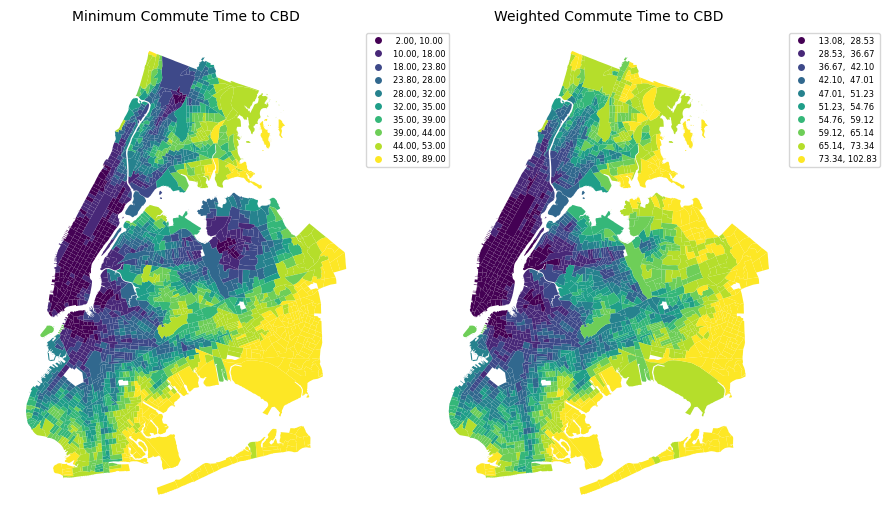

In [35]:
fig, ax = plt.subplots(1,2,figsize = (10,10))

tt.plot(column = 'min_tt',ax = ax[0],legend = True,scheme = 'Quantiles',k=10,
        missing_kwds={"color": "lightgrey", ## what to do with missing values
                                 "edgecolor": "red",
                                 "hatch": "///",
                                 "label": "Missing values",}
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left','fontsize':6,'markerscale':0.5})
ax[0].set_title('Minimum Commute Time to CBD',fontsize = 10)
ax[0].axis('off')
tt.plot(column = 'w_tt',ax=ax[1],legend = True,scheme = 'Quantiles',k=10,
        missing_kwds={"color": "lightgrey", ## what to do with missing values
                                 "edgecolor": "red",
                                 "hatch": "///",
                                 "label": "Missing values",}
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left','fontsize':6,'markerscale':0.5})
ax[1].set_title('Weighted Commute Time to CBD',fontsize = 10)
ax[1].axis('off')
plt.savefig('../Outputs/min_weighted_time_chloropleth.png',bbox_inches = 'tight')
plt.show()